In [1]:
import urllib.request
import os
import tarfile

In [2]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="sample_data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url, filepath)
    print('downloaded:',result)

downloaded: ('sample_data/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x7fc24c2ebd90>)


In [3]:
if not os.path.exists("sample_data/aclImdb"):
    tfile = tarfile.open("sample_data/aclImdb_v1.tar.gz", 'r:gz')
    result=tfile.extractall('sample_data/')

# 1. Import Library

# 資料準備

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [5]:
import re
re_tag = re.compile(r'<[^>]+>')

def rm_tags(text):
    return re_tag.sub('', text)

In [6]:
import os
def read_files(filetype):
    path = "sample_data/aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
        
    print('read',filetype, 'files:',len(file_list))
       
    all_labels = ([1] * 12500 + [0] * 12500) 
    
    all_texts  = []
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_labels,all_texts

In [7]:
y_train,train_text=read_files("train")

read train files: 25000


In [8]:
y_test,test_text=read_files("test")

read test files: 25000


# 建立模型

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [13]:
model = Sequential()

In [14]:
model.add(Embedding(output_dim=32,
                    input_dim=3800, 
                    input_length=380))
model.add(Dropout(0.35))

In [15]:
model.add(SimpleRNN(units=16))

In [16]:
model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.35))

In [17]:
model.add(Dense(units=1,activation='sigmoid' ))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 380, 32)           121600    
                                                                 
 dropout (Dropout)           (None, 380, 32)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 126,993
Trainable params: 126,993
Non-trai

# 訓練模型

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [20]:
import numpy as np

In [21]:
train_history =model.fit(x_train, np.array(y_train),batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

Epoch 1/10
200/200 - 15s - loss: 0.6549 - accuracy: 0.6229 - val_loss: 0.8892 - val_accuracy: 0.1670 - 15s/epoch - 75ms/step
Epoch 2/10
200/200 - 17s - loss: 0.4560 - accuracy: 0.7862 - val_loss: 0.7325 - val_accuracy: 0.6948 - 17s/epoch - 84ms/step
Epoch 3/10
200/200 - 13s - loss: 0.3230 - accuracy: 0.8656 - val_loss: 0.5486 - val_accuracy: 0.8016 - 13s/epoch - 63ms/step
Epoch 4/10
200/200 - 13s - loss: 0.2485 - accuracy: 0.9003 - val_loss: 0.4277 - val_accuracy: 0.8428 - 13s/epoch - 63ms/step
Epoch 5/10
200/200 - 13s - loss: 0.1992 - accuracy: 0.9241 - val_loss: 0.7173 - val_accuracy: 0.7532 - 13s/epoch - 66ms/step
Epoch 6/10
200/200 - 12s - loss: 0.1536 - accuracy: 0.9428 - val_loss: 0.7871 - val_accuracy: 0.7506 - 12s/epoch - 62ms/step
Epoch 7/10
200/200 - 13s - loss: 0.1363 - accuracy: 0.9510 - val_loss: 0.6152 - val_accuracy: 0.8210 - 13s/epoch - 66ms/step
Epoch 8/10
200/200 - 13s - loss: 0.1165 - accuracy: 0.9579 - val_loss: 0.7399 - val_accuracy: 0.7914 - 13s/epoch - 63ms/step


In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

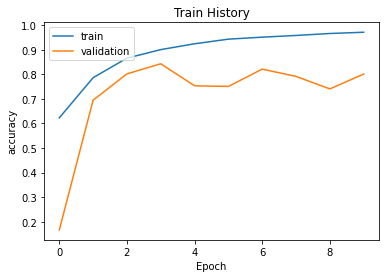

In [23]:
show_train_history(train_history,'accuracy','val_accuracy')

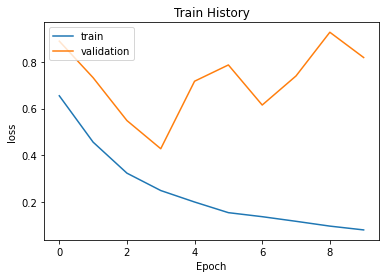

In [24]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [25]:
scores = model.evaluate(x_test, np.array(y_test), verbose=1)
scores[1]

782/782 [==============================] - 10s 13ms/step - loss: 0.6311 - accuracy: 0.8357


0.8357200026512146

# 預測機率

In [26]:
probility=model.predict(x_test)

In [27]:
probility[:10]

array([[0.99635494],
       [0.12442103],
       [0.99308425],
       [0.99937826],
       [0.9445101 ],
       [0.9997255 ],
       [0.9987203 ],
       [0.9997395 ],
       [0.9845396 ],
       [0.999756  ]], dtype=float32)

In [28]:
for p in probility[12500:12510]:
    print(p)

[0.31400645]
[0.16757473]
[0.00660494]
[0.00503084]
[0.07715267]
[0.00120351]
[0.00337207]
[0.00765362]
[0.01891273]
[0.0071511]


# 預測結果

In [29]:
predict=model.predict(x_test)
predict=np.where(predict > 0.5, 1, 0)

In [30]:
predict[:10]

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [31]:
predict.shape

(25000, 1)

In [32]:
predict_classes=predict.reshape(25000)
predict_classes

array([1, 0, 1, ..., 0, 0, 0])

# 查看預測結果

In [33]:
SentimentDict={1:'正面的',0:'負面的'}
def display_test_Sentiment(i):
    print(test_text[i])
    print('label真實值:',SentimentDict[y_test[i]],
          '預測結果:',SentimentDict[predict_classes[i]])

In [34]:
display_test_Sentiment(2)

This has to be my favourite film. The script is sharp and played to the limit by an excellent Miller and fantastic Carlisle! Sharp wit, excellent narrative and no Hollywood polishing; a totally immersible film which has you gunning for the bad guys! Stott excels again as the detestable Chance, while Liv Tyler truly beats her other, lighter performances as the excitement-hungry Rebecca! The soundtrack may not be known to you by name, but anyone who has ever seen Top Gear, watched the football or seen any TV action sequence is probably familiar with it, particularly due to Craig Armstrong's, 'Escape' which must allow him never to work again! The soundtrack on first play may seem out of place in a costume drama/action/comedy, but one re-watching shows it is perfectly at home in giving the the script it's drama.My one gripe about this film is that it isn't shown enough on TV! Where is it? Truly excellent, sharp and classy - you'll not regret watching it - again and again! (exits to switch 

In [35]:
display_test_Sentiment(3)

Turkish-German director Faith Akın ("Head-On" & "The Edge of Heaven") follows German musician and "Head-On" soundtrack composer Alexander Hacke of Einstürzende Neubauten to Istanbul for this documentary which delves into the modern music scene of the city from arabesque to indie rock and was screened out of competition at the 2005 Cannes Film Festival.Alexander Hacke makes for an amiable guide as he travels around Istanbul with a mobile recording studio and a microphone in hand where he runs into and records the likes of classic rocker Erkin Koray, rapper Ceza, Kurdish singer Aynur Doğan, Arabesque singer Orhan Gencebay and pop star Sezen Aksu as well as rock bands Baba Zula, Duman and Replikas.The director has pulled together a diverse collection of popular performers and ground-breaking acts from what was at the time a highly competitive short-list to give an eclectic account of modern Turkish music as seen from the streets of its cultural capital which will enchant and entertain eve

In [36]:
predict_classes[12500:12510]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
display_test_Sentiment(12502)

Okay, anyone looking to see a great work of art should NOT watch this film. A sophisticated film connoisseur will no doubt be nauseated by the horrid production values and the sight of watching an excellent actor (Joseph Cotten) whoring himself out for a buck. Mr. Cotten must have either really needed the money or he was too senile to realize that the film was crap. The same phenomenon occurred with Dana Andrews, who late in his career appeared in the campy and awful FROZEN DEAD. I know Mr. Andrews was in the throes of alcoholism, but why did Cotten do this mess?!As for the plot, it's a reworking of the Frankenstein plot. The first half of the movie really looked as if they were doing a serious but seriously flawed version of the original Frankenstein story. Then, inexplicably, they introduced a daughter. This wasn't a bad thing,...until then, out of the blue, they decided to stop making a horror film but make a soft-core pornographic flick!! The change was dramatic and bizarre. It was

In [ ]:
#預測新的影評

In [38]:
input_text='''
I can't vote because I have not watched this movie yet. I've been wanting to watch this movie since the time they announced making it which is about 2 years ago (!)
I was planning to go with the family to see the anticipated movie but my nieces had school exams at the opening time so we all decided to wait for the next weekend. I was utterly shocked to learn yesterday that they pulled the movie from the Kuwaiti theaters "temporarily" so that the outrageous censorship system can remove some unwanted scenes.
The controversial gay "moment" according to my online research is barely there, so I can't find any logical reason for all the fuss that's been going on. And it was bad enough when fanatics and haters tried (in vain) to kill the movie with low ratings and negative reviews even before it was in the cinemas and I'm pretty sure most of those trolls never got the chance to watch the movie at that time.
Based on the trailers, I think the movie is very promising and entertaining and you can't simply overlook the tremendous efforts made to bring this beloved tale to life. To knock down hundreds of people's obvious hard work with unprofessional critique and negative reviews just for the sake of hatred is unfathomable. I hope people won't judge a movie before having the experience of watching it in the first place.
Impatiently waiting for the Kuwaiti cinemas to bring back the movie... 
'''

In [39]:
input_seq = token.texts_to_sequences([input_text])

In [40]:
print(input_seq[0])

[9, 187, 2304, 84, 9, 24, 20, 292, 10, 16, 242, 203, 73, 1779, 5, 102, 10, 16, 233, 1, 54, 32, 227, 8, 59, 6, 40, 237, 149, 592, 9, 12, 3591, 5, 136, 15, 1, 219, 5, 63, 1, 16, 17, 57, 65, 391, 29, 1, 632, 54, 34, 71, 28, 867, 5, 854, 14, 1, 371, 2484, 9, 12, 1247, 2412, 5, 847, 11, 32, 1914, 1, 16, 35, 1, 2257, 34, 11, 1, 3584, 1505, 66, 45, 135, 1, 3124, 988, 557, 1791, 5, 57, 2297, 6, 1196, 46, 34, 9, 187, 165, 97, 3678, 279, 14, 28, 1, 194, 73, 166, 19, 2, 8, 12, 75, 191, 50, 2, 799, 7, 5, 512, 1, 16, 15, 360, 2887, 2, 1559, 853, 56, 154, 8, 12, 7, 1, 2, 142, 180, 248, 87, 4, 144, 111, 184, 1, 576, 5, 102, 1, 16, 29, 11, 54, 444, 19, 1, 9, 100, 1, 16, 6, 51, 2427, 2, 438, 2, 21, 187, 327, 1, 3513, 2043, 89, 5, 717, 10, 2750, 782, 5, 109, 5, 3303, 176, 3100, 4, 2852, 573, 250, 153, 15, 2, 1559, 853, 39, 14, 1, 2114, 4, 3677, 6, 9, 436, 80, 524, 1922, 3, 16, 154, 256, 1, 580, 4, 145, 8, 7, 1, 82, 269, 1061, 14, 1, 5, 717, 141, 1, 16]


In [41]:
len(input_seq[0] )

223

In [42]:
pad_input_seq  = sequence.pad_sequences(input_seq , maxlen=380)

In [43]:
len(pad_input_seq[0])

380

In [44]:
predict=model.predict(pad_input_seq)
predict_result=np.where(predict > 0.5, 1, 0)

In [45]:
predict_result

array([[0]])

In [46]:
SentimentDict[predict_result[0][0]]

'負面的'

In [47]:
def predict_review(input_text):
    input_seq = token.texts_to_sequences([input_text])
    pad_input_seq  = sequence.pad_sequences(input_seq , maxlen=380)
    predict=model.predict(pad_input_seq)
    predict_result=np.where(predict > 0.5, 1, 0)
    print(SentimentDict[predict_result[0][0]])

In [ ]:
#http://www.imdb.com/title/tt2771200/
#http://www.imdb.com/title/tt2771200

In [48]:
predict_review('''
As a fan of the original Disney film (Personally I feel it's their masterpiece) I was taken aback to the fact that a new version was in the making. Still excited I had high hopes for the film. Most of was shattered in the first 10 minutes. Campy acting with badly performed singing starts off a long journey holding hands with some of the worst CGI Hollywood have managed to but to screen in ages.
A film that is over 50% GCI, should focus on making that part believable, unfortunately for this film, it's far from that. It looks like the original film was ripped apart frame by frame and the beautiful hand-painted drawings have been replaced with digital caricatures. Besides CGI that is bad, it's mostly creepy. As the little teacup boy will give me nightmares for several nights to come. Emma Watson plays the same character as she always does, with very little acting effort and very little conviction as Belle. Although I can see why she was cast in the film based on merits, she is far from the right choice for the role. Dan Stevens does alright under as some motion captured dead-eyed Beast, but his performance feels flat as well. Luke Evans makes for a great pompous Gaston, but a character that has little depth doesn't really make for a great viewing experience. Josh Gad is a great comic relief just like the original movie's LeFou. Other than that, none of the cast stands out enough for me to remember them. Human or CHI creature. I was just bored through out the whole experience. And for a project costing $160 000 000, I can see why the PR department is pushing it so hard because they really need to get some cash back on this pile of wet stinky CGI-fur!
All and all, I might be bias from really loving Disney's first adaptation. That for me marks the high-point of all their work, perfectly combining the skills of their animators along with some CGI in a majestic blend. This film however is more like the bucket you wash off your paintbrush in, it has all the same colors, but muddled with water and to thin to make a captivating story from. The film is quite frankly not worth your time, you would be better off watching the original one more time. 
''')

負面的


In [49]:
predict_review('''
I was really looking forward to this film. Not only has Disney recently made excellent live-action versions of their animated masterpieces (Jungle Book, Cinderella), but the cast alone (Emma Watson, Ian McKellen, Kevin Kline) already seemed to make this one a sure hit. Well, not so much as it turns out.
Some of the animation is fantastic, but because characters like Cogsworth (the clock), Lumière (the candelabra) and Chip (the little tea cup) now look "realistic", they lose a lot of their animated predecessors' charm and actually even look kind of creepy at times. And ironically - unlike in the animated original - in this new realistic version they only have very limited facial expressions (which is a creative decision I can't for the life of me understand).
Even when it works: there can be too much of a good thing. The film is overstuffed with lush production design and cgi (which is often weirdly artificial looking though) but sadly lacking in charm and genuine emotion. If this were a music album, I'd say it is "over-produced" and in need of more soul and swing. The great voice talent in some cases actually seems wasted, because it drowns in a sea of visual effects that numbs all senses. The most crucial thing that didn't work for me, though, is the Beast. He just never looks convincing. The eyes somehow don't look like real eyes and they're always slightly off.
On the positive side, I really liked Gaston, and the actor who played him, Luke Evans, actually gave the perhaps most energized performance of all. Kevin Kline as Belle's father has little to do but to look fatherly and old, but he makes the most of his part. Speaking of Belle, now that I've seen the film, I think her role was miscast. I think someone like Rachel McAdams would actually have been a more natural, lively and perhaps a bit more feisty Belle than Emma Watson.
If you love the original, you might want to give this one a pass, it's really not that good (although at least the songs were OK). Also, I'd think twice before bringing small children; without cute animated faces, all those "realistic" looking creatures and devices can be rather frightening for a child. ''')

正面的


In [50]:
predict_review('''
The original Beauty and the Beast was my favorite cartoon as a kid but it did have major plot holes. Why had no one else ever seen the castle or knew where it was? Didn't anyone miss the people who were cursed? All of that gets an explanation when the enchantress places her curse in the beginning. Why did Belle and her Father move to a small town? Her mother died and the father thought it as best to leave. I love the new songs and added lyrics to the originals. I like the way the cgi beast looks (just the face is CGi). I think Emma Watson is a perfect Belle who is outspoken, fearless, and different. The set design is perfect for the era in France.
I know a lot of people disagree but I found this remake with all its changes to be more enchanting, beautiful, and complete than the original 1991 movie. To each his own but I think everyone should see it for themselves. 
''')

正面的


In [51]:
predict_review('''
"Beauty and the Beast" was stunning and gorgeous. Beautifully and artfully performed. Dazzlingly colorful and charming. Fresh and lighthearted. Wonderfully and magically enthralling. I laughed, I cried, I floated along with the music, I bawled and bawled as the spellbinding elegance and splendor took me to another place and time. I was 5 years old again enjoying the Wonderful World of Magic that is Disney, as if for the first time. I will gladly spend my money over and over to see that magic unfold. I willingly and happily concede Emma Watson to be Belle, for this generation of children, instead of Hermione. She has earned her place as a Disney princess and I applaud everyone who had a part in this piece of magic. Truly, Disney knows how to make us all children again. 
''')

正面的


# serialize model to JSON

In [55]:
! mkdir SaveModel

In [56]:
model_json = model.to_json()
with open("SaveModel/Imdb_RNN_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("SaveModel/Imdb_RNN_model.h5")
print("Saved model to disk")

Saved model to disk
